In [5]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

train_data = pd.read_csv("dataset/train.csv")

In [6]:
# Selected features and label
features = train_data.drop("A", axis=1)
label = train_data["A"]

# Create and train decision tree
dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=1)
dt = dt.fit(features, label)
print("accuracy score (max-depth = 1):", dt.score(features, label))

# Second tree to test changing max depth and see results in test data later
dt2 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=2)
dt2 = dt2.fit(features, label)
print("accuracy score (max-depth = 2):", dt2.score(features, label))

accuracy score (max-depth = 1): 0.6428571428571429
accuracy score (max-depth = 2): 0.7857142857142857


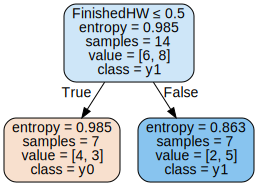

In [7]:
# Decision Tree 1
feature_names = list(features.columns)
tree_data = tree.export_graphviz(dt, out_file=None, feature_names=feature_names, class_names=True, filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(tree_data)  
graph

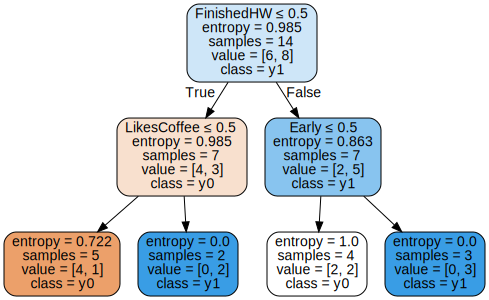

In [8]:
# Decision Tree 2
feature_names = list(features.columns)
tree_data = tree.export_graphviz(dt2, out_file=None, feature_names=feature_names, class_names=True, filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(tree_data)  
graph

In [9]:
# Start the 5 fold cross validation process on the DT and calculate the mean of the accuracy
scores = cross_val_score(dt, X=features, y=label, cv=5)
scores2 = cross_val_score(dt2, X=features, y=label, cv=5)
print("5 fold CV DT accuracy scores (depth 1):", scores)
print("5 fold CV DT mean accuracy (depth 1):", np.mean(scores))
print("\n----------------------------\n")
print("5 fold CV DT accuracy scores (depth 2):", scores2)
print("5 fold CV DT mean accuracy (depth 2):", np.mean(scores2))

5 fold CV DT accuracy scores (depth 1): [0.         0.33333333 0.         0.33333333 0.5       ]
5 fold CV DT mean accuracy (depth 1): 0.2333333333333333

----------------------------

5 fold CV DT accuracy scores (depth 2): [0.33333333 0.66666667 0.33333333 0.66666667 0.        ]
5 fold CV DT mean accuracy (depth 2): 0.4
